<a href="https://www.kaggle.com/code/furkanuysl/housepriceprediction-regressiontechniques?scriptVersionId=92494894" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# EDA and Price Prediction
### Competition Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.
### Acknowledgments

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 
<font color = "green" >

#### Content:   
    
1. [Loading and Checking Data Set](#1)
1. [Variable Analysis and Visualization](#2) 
    * [Visualization of Categorical Variables](#3)
    * [Visualization of Numerical Variables](#4)
1. [Data Analysis](#5)
    * [Handling Outliers](#7)
    * [Handling Missing Values and Feature Engineering](#6)
    * [Relationship Between Some Variables](#8)
1. [Modelling](#19)
    * [Hyperparameter Tuning - Grid Search - Cross Validation](#20)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

In [2]:
d_train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
d_test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

* We have 1460 total entries and 80 different column.
* We have null values in some columns.

In [4]:
print("First 5 raws of data:")
d_train.head()

First 5 raws of data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print("Last 5 raws of data:")
d_train.tail()

Last 5 raws of data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
d_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


<a id = "2"></a>
## Variable Analysis

#### Here's a brief version of what you'll find in the data description file.

1. SalePrice : the property's sale price in dollars. This is the target variable that you're trying to predict.
2. MSSubClass: The building class
3. MSZoning: The general zoning classification
4. LotFrontage: Linear feet of street connected to property
5. LotArea: Lot size in square feet
6. Street: Type of road access
7. Alley: Type of alley access
8. LotShape: General shape of property
9. LandContour: Flatness of the property
10. Utilities: Type of utilities available
11. LotConfig: Lot configuration
12. LandSlope: Slope of property
13. Neighborhood: Physical locations within Ames city limits
14. Condition1: Proximity to main road or railroad
15. Condition2: Proximity to main road or railroad (if a second is present)
16. BldgType: Type of dwelling
17. HouseStyle: Style of dwelling
18. OverallQual: Overall material and finish quality
19. OverallCond: Overall condition rating
20. YearBuilt: Original construction date
21. YearRemodAdd: Remodel date
22. RoofStyle: Type of roof
23. RoofMatl: Roof material
24. Exterior1st: Exterior covering on house
25. Exterior2nd: Exterior covering on house (if more than one material)
26. MasVnrType: Masonry veneer type
27. MasVnrArea: Masonry veneer area in square feet
28. ExterQual: Exterior material quality
29. ExterCond: Present condition of the material on the exterior
30. Foundation: Type of foundation
31. BsmtQual: Height of the basement
32. BsmtCond: General condition of the basement
33. BsmtExposure: Walkout or garden level basement walls
34. BsmtFinType1: Quality of basement finished area
35. BsmtFinSF1: Type 1 finished square feet
36. BsmtFinType2: Quality of second finished area (if present)
37. BsmtFinSF2: Type 2 finished square feet
38. BsmtUnfSF: Unfinished square feet of basement area
38. TotalBsmtSF: Total square feet of basement area
39. Heating: Type of heating
40. HeatingQC: Heating quality and condition
41. CentralAir: Central air conditioning
42. Electrical: Electrical system
43. 1stFlrSF: First Floor square feet
44. 2ndFlrSF: Second floor square feet
45. LowQualFinSF: Low quality finished square feet (all floors)
46. GrLivArea: Above grade (ground) living area square feet
47. BsmtFullBath: Basement full bathrooms
48. BsmtHalfBath: Basement half bathrooms
49. FullBath: Full bathrooms above grade
50. HalfBath: Half baths above grade
51. Bedroom: Number of bedrooms above basement level
52. Kitchen: Number of kitchens
53. KitchenQual: Kitchen quality
54. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
55. Functional: Home functionality rating
56. Fireplaces: Number of fireplaces
57. FireplaceQu: Fireplace quality
58. GarageType: Garage location
59. GarageYrBlt: Year garage was built
60. GarageFinish: Interior finish of the garage
61. GarageCars: Size of garage in car capacity
62. GarageArea: Size of garage in square feet
63. GarageQual: Garage quality
64. GarageCond: Garage condition
65. PavedDrive: Paved driveway
66. WoodDeckSF: Wood deck area in square feet
67. OpenPorchSF: Open porch area in square feet
68. EnclosedPorch: Enclosed porch area in square feet
69. 3SsnPorch: Three season porch area in square feet
70. ScreenPorch: Screen porch area in square feet
71. PoolArea: Pool area in square feet
72. PoolQC: Pool quality
73. Fence: Fence quality
74. MiscFeature: Miscellaneous feature not covered in other categories
75. MiscVal: "$" Value of miscellaneous feature
76. MoSold: Month Sold
77. YrSold: Year Sold
78. SaleType: Type of sale
79. SaleCondition: Condition of sale


<font color = "green" >
dtypes:
    
<font color = "black" >
    
* object : 43
* int64 : 35
*float64 3



<font color = "green" >


We have 57 categorical, 24 numerical variable.

<font color = "black" >

* **Categorical variables:** 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'

* **Numerical variables:** 'Id', 'LotFrontage', 'LotArea', 'Neighborhood', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice'

We have 80 columns in our train data. So it will take time to manually find the types of variables. In order to determine whether the variable is categorical or numerical I will code few lines.

I determine the treshold as 20 for categorical variables.

In [7]:
categorical_features = []
threshold = 20
for each in d_train.columns:
    if d_train[each].nunique() < threshold:
        categorical_features.append(each)
    
numerical_features = []
for each in d_train.columns:
    if each not in categorical_features:
        numerical_features.append(each)
        
print("Categorical Variables:\n\n",categorical_features,"\n\n")        
print("Numerical Variables:\n\n",numerical_features )

Categorical Variables:

 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'] 


Numerical Variables:

 ['Id', 'LotFrontage', 'LotArea', 'Neighborhood', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQ

In [8]:
numerical_features

['Id',
 'LotFrontage',
 'LotArea',
 'Neighborhood',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

<a id = "3"></a>
### Visualization of Categorical Variables

Now, I will visualize categorical variables as bar plot. Thus, the densities of categorical variables will be more understandable.

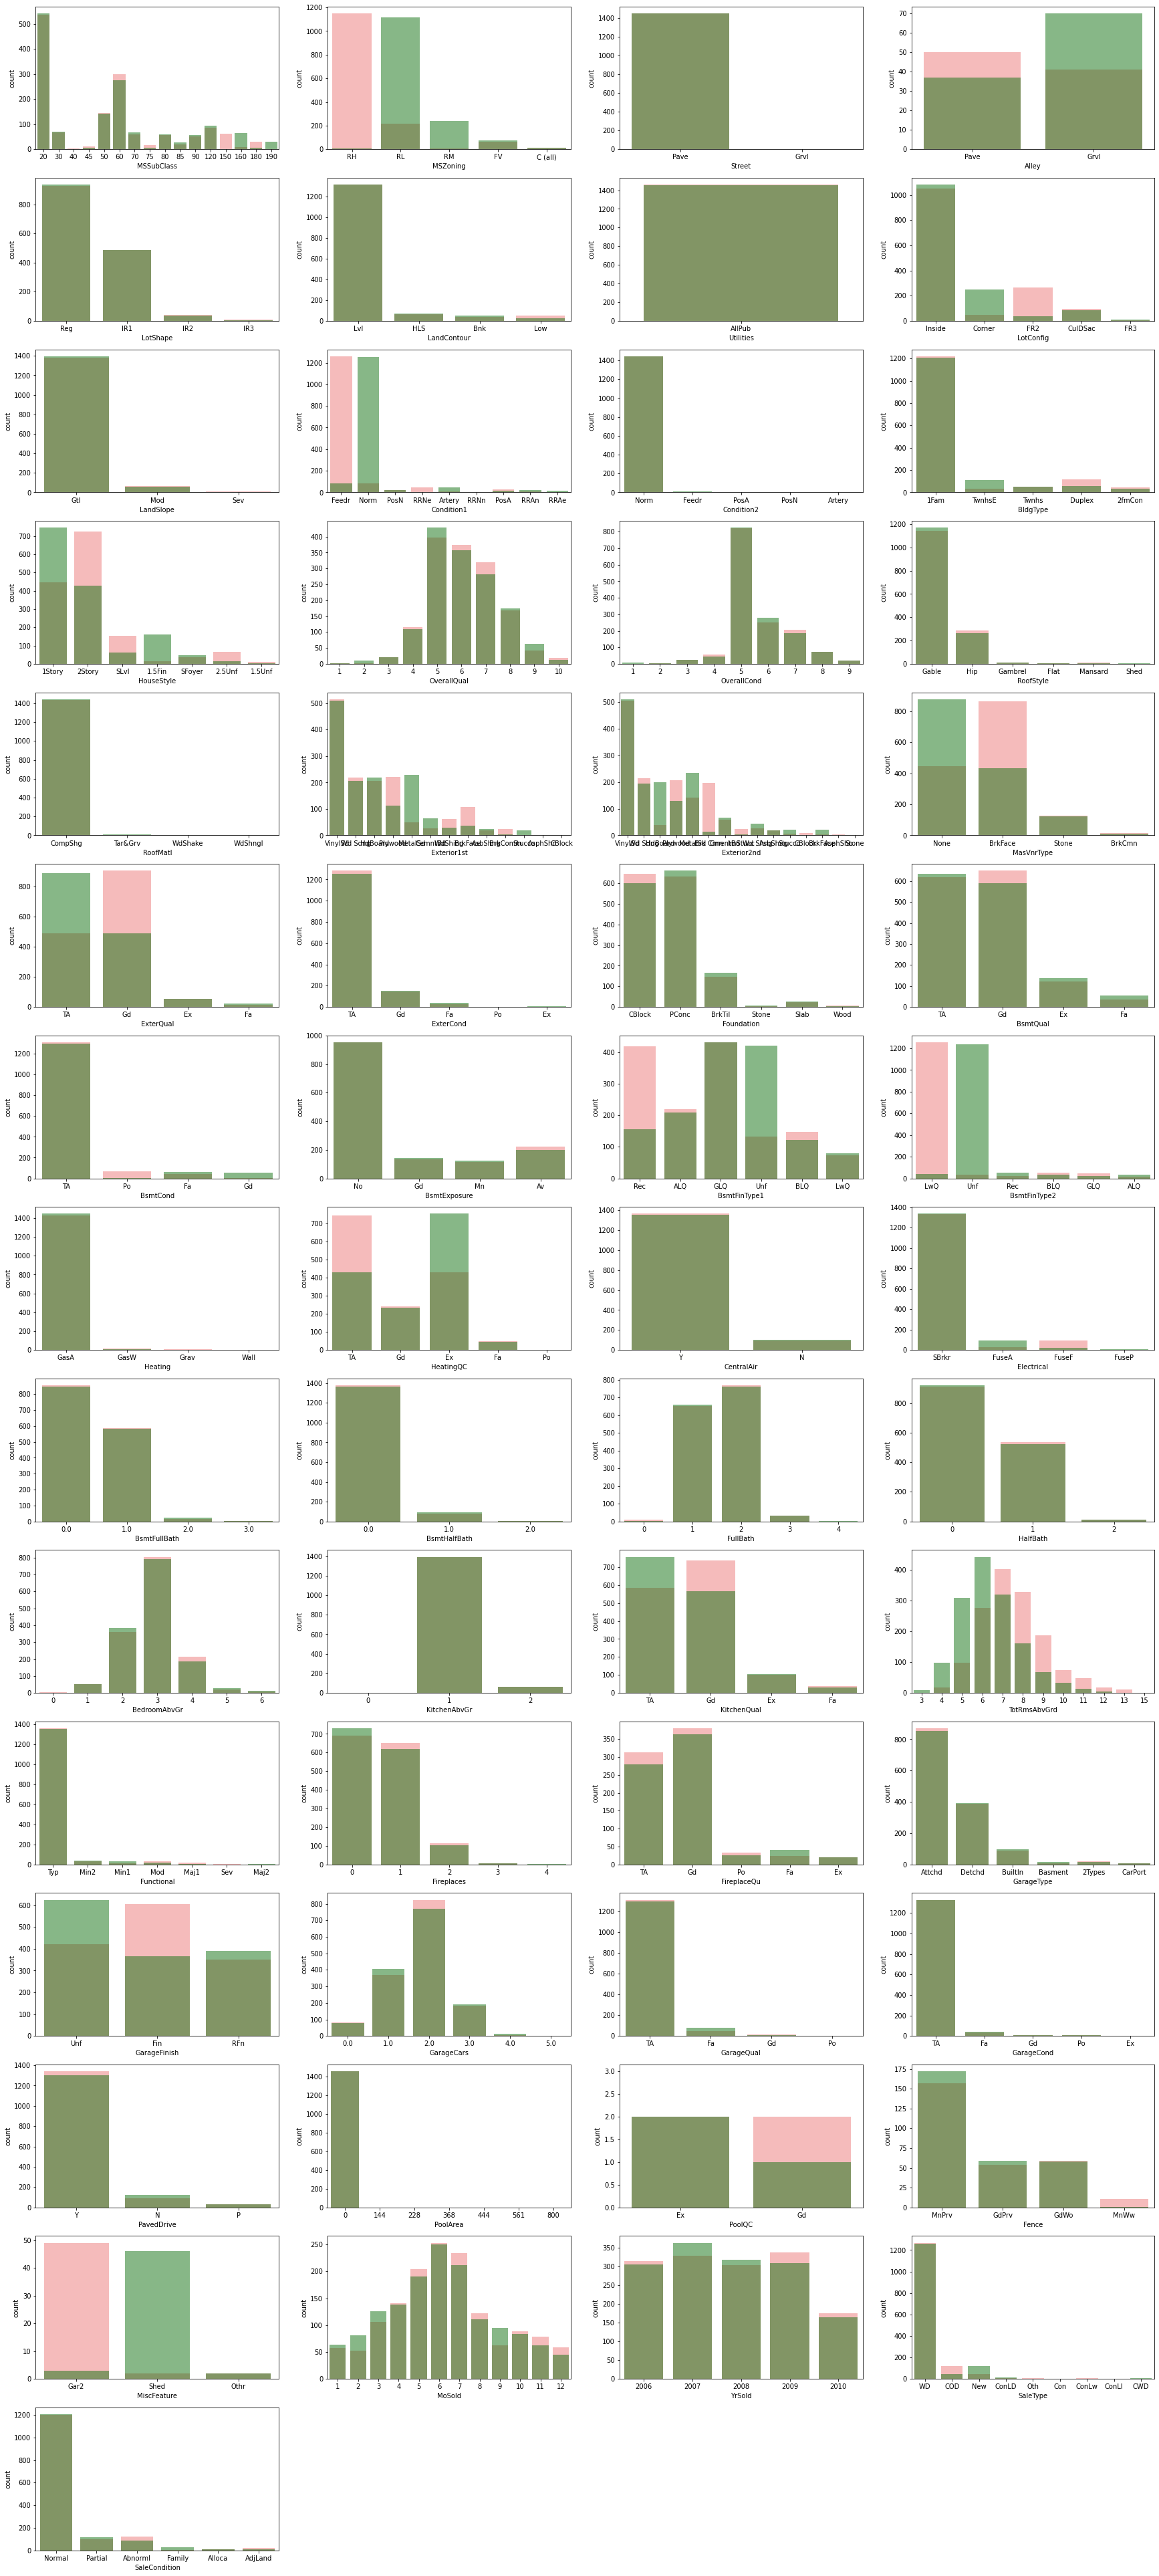

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,70))

for i,var in enumerate(categorical_features):
    
    plt.subplot(15,4,i+1)
    sns.countplot(data = d_train, x = var, alpha = 0.3, color="red")
    sns.countplot(data = d_test, x = var, alpha = 0.5, color = "green")

<a id = "4"></a>
### Visualization of Numerical Variables

Now, we will visualize numerical variables as histogram plot. Thus, the densities of numerical variables will be more understandable.

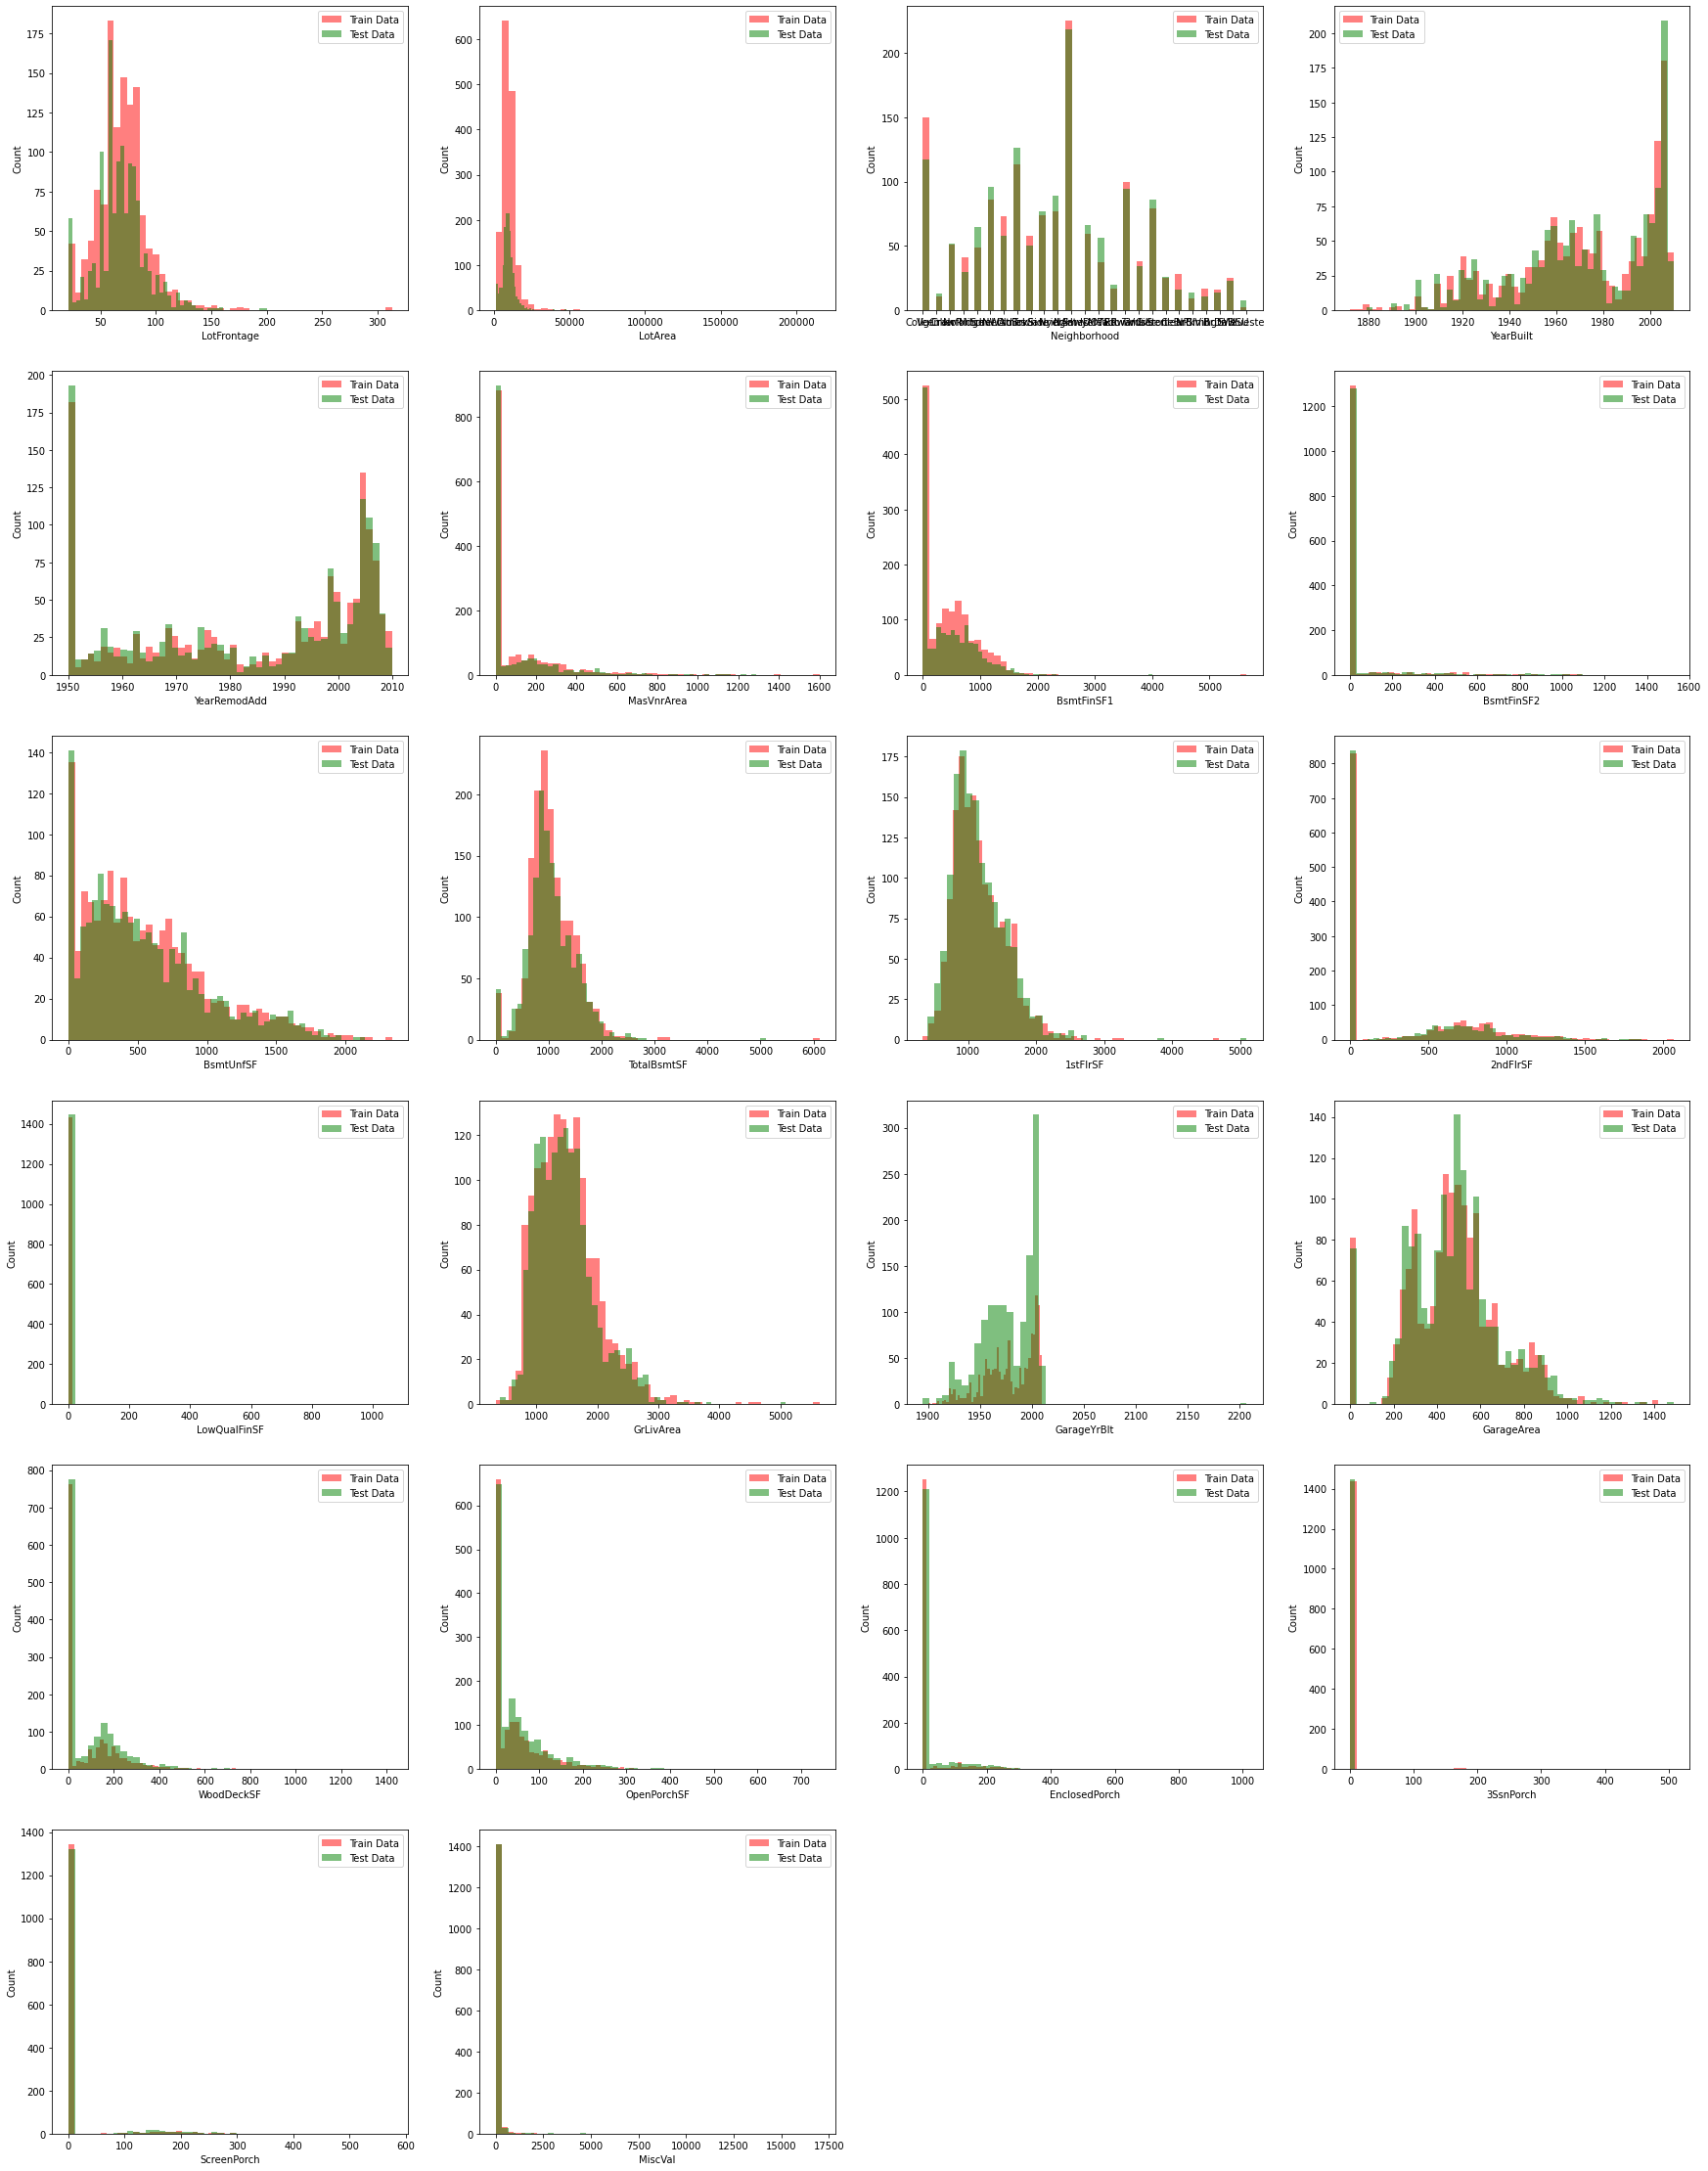

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
    
plt.figure(figsize=(30,40))

for i,var in enumerate(numerical_features[1:]):
    if var == "SalePrice":
        break    
    else:
        
        plt.subplot(6,4,i+1)
    
        plt.hist(d_train[var], bins=50, color = "red", alpha = 0.5, label= "Train Data")
        plt.xlabel(var)
        plt.ylabel("Count")
        plt.legend()
    


        plt.hist(d_test[var], bins=50, color = "green", alpha = 0.5, label= "Test Data")
        plt.legend()

<a id = "5"></a>
## Data Analysis

<a id = "7"></a>


### Handling Outliers

Wikipedia definition: In statistics, an **outlier** is an observation point that is distant from other observations.

Outliers may be caused by many different reasons. Such as a mistake during data collection or it can be just an sign of variance in your data. 

    1st quartile (Q1): %25
    2nd quartile (Q2): Median value
    3rd quartile (Q3): %75

    IQR = Q3 - Q1

    Lower Outlier Limit = Q1 - (1.5 * IQR)
    Higher Outlier Limit = Q3 + (1.5 * IQR)
    
    Values that lower than lower outlier limit and higher than higher outlier limit are our outliers.



Box plots are one of the good ways to see outliers.




In [11]:
outlier_indexes = []
def outlier_plotting(feature):
    outlier = [] 
    # Plotting section
    plt.figure(figsize=(6,3))
    sns.boxplot(x=d_train[feature], palette="Set3")
    plt.title("{}'s Outlier Box Plot".format(feature), weight = "bold")
    plt.xlabel(feature, weight = "bold")
    plt.show()
    
    # Outlier computing
    Q1 = d_train[feature].quantile(0.25)
    Q3 = d_train[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_outlier_limit = Q1 - (1.5 * IQR)
    higher_outlier_limit = Q3 + (1.5 * IQR)
    
    print("Values lower than {} and higher than {} are outliers for {}.\n".format(lower_outlier_limit,higher_outlier_limit,feature))

    # There are different ways to detect and show outlier values, I will use Z-Score method instead of writing conditional function.
    
    # Outlier detecting
    threshold = 3

    for i in d_train[feature]:
        z = (i-d_train[feature].mean())/d_train[feature].std()
        if z > threshold: 
            outlier.append(i)
            index = d_train[d_train[feature] == i].index[0]
            outlier_indexes.append(index)      
    if outlier == []:
        print("No any outliers for {}.".format(feature))
    else:
        print("There are {} outliers for {}:".format(len(outlier),feature), outlier)

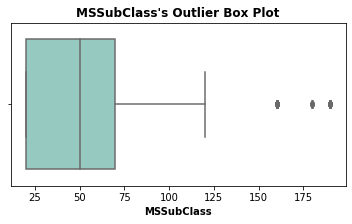

Values lower than -55.0 and higher than 145.0 are outliers for MSSubClass.

There are 30 outliers for MSSubClass: [190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190]


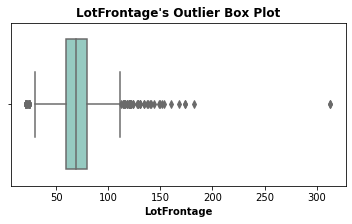

Values lower than 27.5 and higher than 111.5 are outliers for LotFrontage.

There are 12 outliers for LotFrontage: [174.0, 174.0, 150.0, 144.0, 149.0, 313.0, 168.0, 182.0, 160.0, 152.0, 313.0, 153.0]


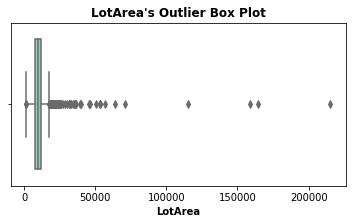

Values lower than 1481.5 and higher than 17673.5 are outliers for LotArea.

There are 13 outliers for LotArea: [50271, 159000, 215245, 164660, 53107, 70761, 53227, 46589, 115149, 53504, 45600, 63887, 57200]


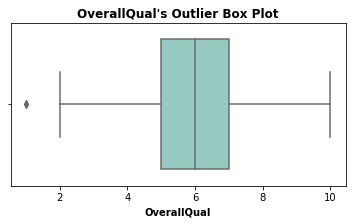

Values lower than 2.0 and higher than 10.0 are outliers for OverallQual.

No any outliers for OverallQual.


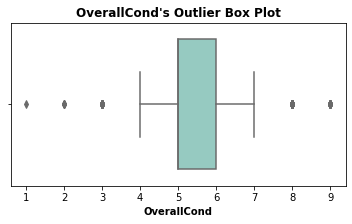

Values lower than 3.5 and higher than 7.5 are outliers for OverallCond.

There are 22 outliers for OverallCond: [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]


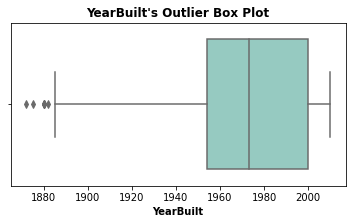

Values lower than 1885.0 and higher than 2069.0 are outliers for YearBuilt.

No any outliers for YearBuilt.


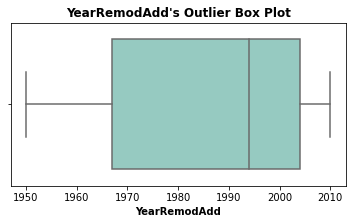

Values lower than 1911.5 and higher than 2059.5 are outliers for YearRemodAdd.

No any outliers for YearRemodAdd.


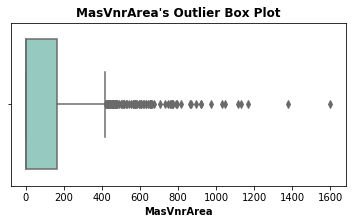

Values lower than -249.0 and higher than 415.0 are outliers for MasVnrArea.

There are 32 outliers for MasVnrArea: [650.0, 1031.0, 1115.0, 768.0, 1129.0, 664.0, 653.0, 748.0, 922.0, 1600.0, 870.0, 650.0, 772.0, 921.0, 762.0, 660.0, 1170.0, 651.0, 894.0, 673.0, 860.0, 1047.0, 816.0, 760.0, 975.0, 660.0, 1378.0, 766.0, 788.0, 796.0, 705.0, 731.0]


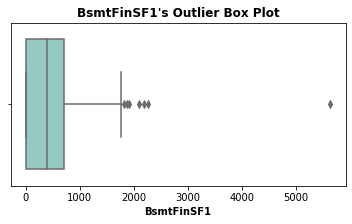

Values lower than -1068.375 and higher than 1780.625 are outliers for BsmtFinSF1.

There are 6 outliers for BsmtFinSF1: [1880, 1904, 2260, 2188, 2096, 5644]


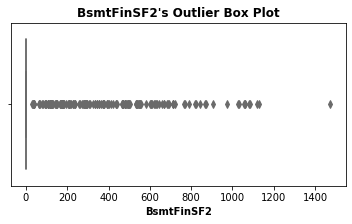

Values lower than 0.0 and higher than 0.0 are outliers for BsmtFinSF2.

There are 50 outliers for BsmtFinSF2: [668, 712, 869, 670, 1080, 768, 712, 580, 690, 692, 1063, 620, 820, 1474, 544, 531, 539, 713, 1120, 532, 1127, 645, 551, 606, 612, 723, 551, 1057, 630, 764, 539, 1085, 823, 634, 841, 1061, 682, 557, 791, 547, 600, 1031, 906, 608, 661, 972, 546, 872, 627, 1029]


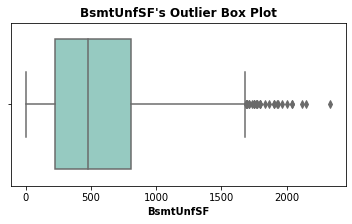

Values lower than -654.5 and higher than 1685.5 are outliers for BsmtUnfSF.

There are 11 outliers for BsmtUnfSF: [1907, 2336, 2121, 2153, 1969, 2042, 2046, 1935, 1926, 1905, 2002]


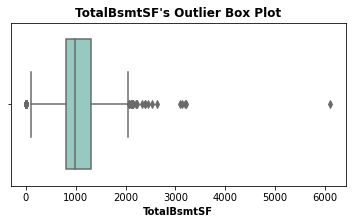

Values lower than 42.0 and higher than 2052.0 are outliers for TotalBsmtSF.

There are 10 outliers for TotalBsmtSF: [2392, 3206, 3094, 3200, 3138, 2444, 2524, 2396, 6110, 2633]


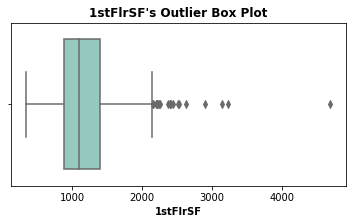

Values lower than 118.125 and higher than 2155.125 are outliers for 1stFlrSF.

There are 12 outliers for 1stFlrSF: [2392, 2402, 3228, 3138, 2515, 2444, 2364, 2898, 2524, 2411, 4692, 2633]


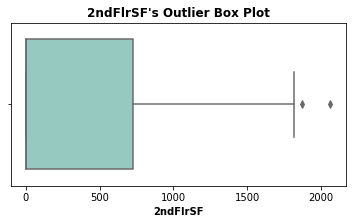

Values lower than -1092.0 and higher than 1820.0 are outliers for 2ndFlrSF.

There are 4 outliers for 2ndFlrSF: [1818, 1872, 1796, 2065]


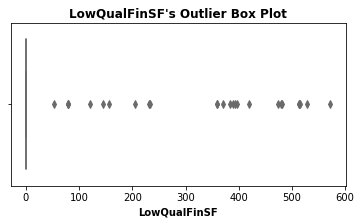

Values lower than 0.0 and higher than 0.0 are outliers for LowQualFinSF.

There are 20 outliers for LowQualFinSF: [360, 513, 234, 528, 572, 392, 371, 390, 420, 473, 156, 515, 360, 232, 481, 514, 397, 479, 205, 384]


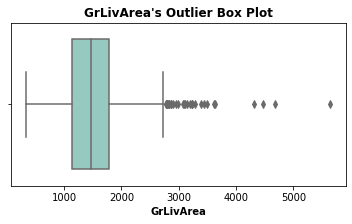

Values lower than 158.625 and higher than 2747.625 are outliers for GrLivArea.

There are 16 outliers for GrLivArea: [3222, 3608, 3112, 3493, 3228, 4676, 3194, 3395, 4316, 3279, 3140, 3627, 4476, 3447, 5642, 3238]


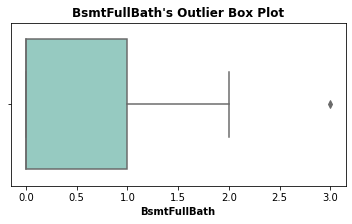

Values lower than -1.5 and higher than 2.5 are outliers for BsmtFullBath.

There are 16 outliers for BsmtFullBath: [2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2]


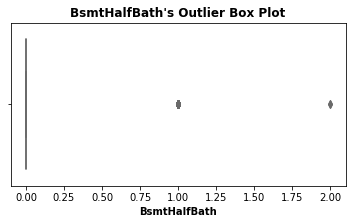

Values lower than 0.0 and higher than 0.0 are outliers for BsmtHalfBath.

There are 82 outliers for BsmtHalfBath: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


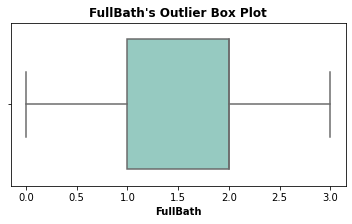

Values lower than -0.5 and higher than 3.5 are outliers for FullBath.

No any outliers for FullBath.


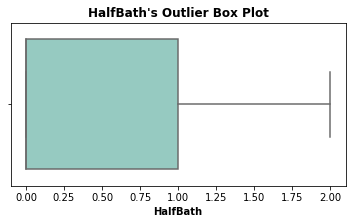

Values lower than -1.5 and higher than 2.5 are outliers for HalfBath.

There are 12 outliers for HalfBath: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


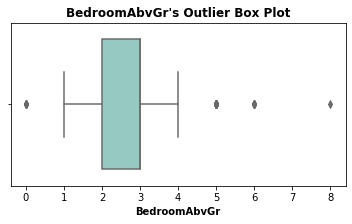

Values lower than 0.5 and higher than 4.5 are outliers for BedroomAbvGr.

There are 8 outliers for BedroomAbvGr: [6, 6, 6, 6, 8, 6, 6, 6]


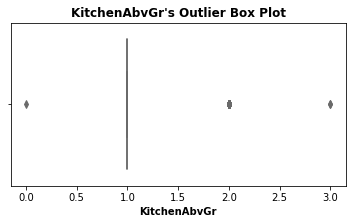

Values lower than 1.0 and higher than 1.0 are outliers for KitchenAbvGr.

There are 67 outliers for KitchenAbvGr: [2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


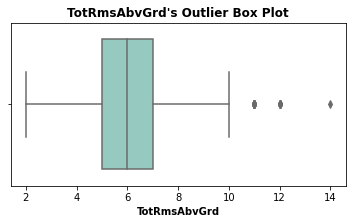

Values lower than 2.0 and higher than 10.0 are outliers for TotRmsAbvGrd.

There are 12 outliers for TotRmsAbvGrd: [12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


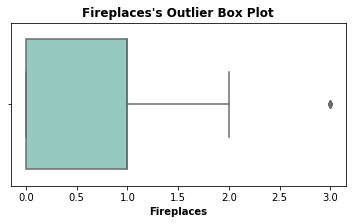

Values lower than -1.5 and higher than 2.5 are outliers for Fireplaces.

There are 5 outliers for Fireplaces: [3, 3, 3, 3, 3]


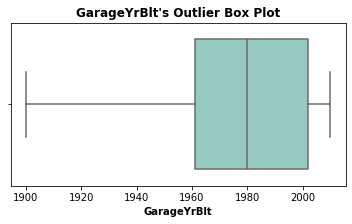

Values lower than 1899.5 and higher than 2063.5 are outliers for GarageYrBlt.

No any outliers for GarageYrBlt.


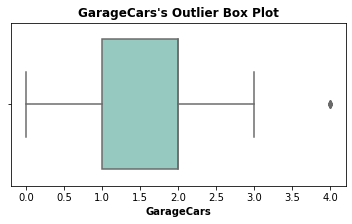

Values lower than -0.5 and higher than 3.5 are outliers for GarageCars.

No any outliers for GarageCars.


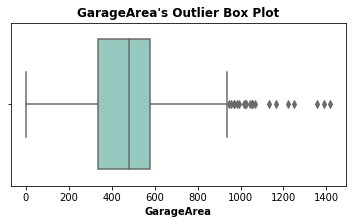

Values lower than -27.75 and higher than 938.25 are outliers for GarageArea.

There are 7 outliers for GarageArea: [1166, 1390, 1134, 1220, 1248, 1356, 1418]


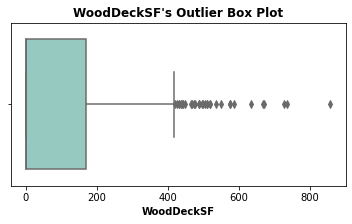

Values lower than -252.0 and higher than 420.0 are outliers for WoodDeckSF.

There are 22 outliers for WoodDeckSF: [857, 576, 476, 574, 670, 495, 536, 519, 517, 503, 486, 486, 511, 550, 509, 474, 728, 635, 500, 668, 586, 736]


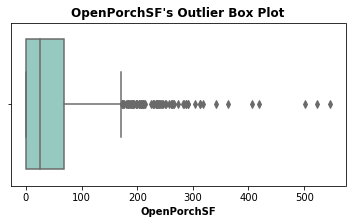

Values lower than -102.0 and higher than 170.0 are outliers for OpenPorchSF.

There are 27 outliers for OpenPorchSF: [258, 260, 250, 523, 285, 406, 502, 274, 312, 267, 265, 288, 341, 247, 291, 312, 418, 364, 252, 282, 319, 263, 304, 287, 292, 547, 262]


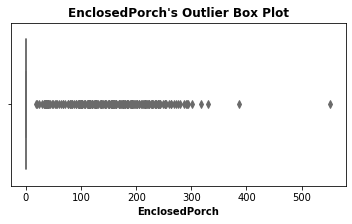

Values lower than 0.0 and higher than 0.0 are outliers for EnclosedPorch.

There are 51 outliers for EnclosedPorch: [272, 228, 228, 552, 252, 224, 234, 244, 268, 294, 218, 242, 248, 236, 291, 210, 240, 293, 216, 239, 252, 240, 216, 234, 386, 264, 275, 230, 254, 224, 318, 244, 226, 228, 220, 252, 216, 214, 280, 236, 330, 208, 259, 264, 286, 301, 221, 212, 216, 216, 252]


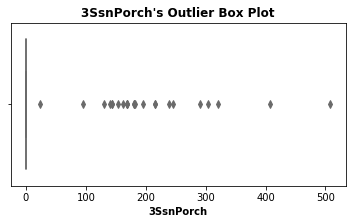

Values lower than 0.0 and higher than 0.0 are outliers for 3SsnPorch.

There are 23 outliers for 3SsnPorch: [320, 407, 130, 180, 168, 180, 140, 508, 238, 245, 196, 144, 144, 182, 168, 162, 168, 216, 96, 216, 153, 290, 304]


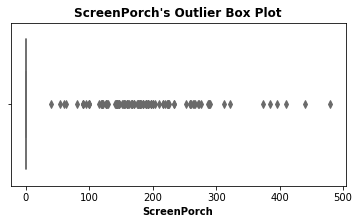

Values lower than 0.0 and higher than 0.0 are outliers for ScreenPorch.

There are 55 outliers for ScreenPorch: [198, 291, 252, 184, 192, 410, 224, 266, 259, 198, 271, 234, 184, 374, 192, 185, 224, 396, 276, 192, 200, 189, 260, 385, 287, 200, 216, 210, 197, 204, 192, 225, 192, 312, 222, 265, 224, 322, 190, 233, 189, 189, 189, 192, 273, 288, 263, 224, 288, 259, 224, 216, 480, 440, 220]


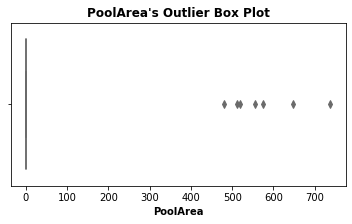

Values lower than 0.0 and higher than 0.0 are outliers for PoolArea.

There are 7 outliers for PoolArea: [512, 648, 576, 555, 480, 519, 738]


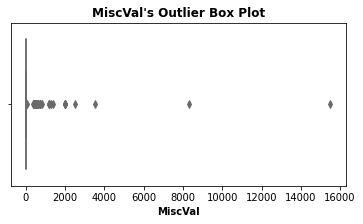

Values lower than 0.0 and higher than 0.0 are outliers for MiscVal.

There are 8 outliers for MiscVal: [15500, 2000, 2000, 3500, 2000, 8300, 2000, 2500]


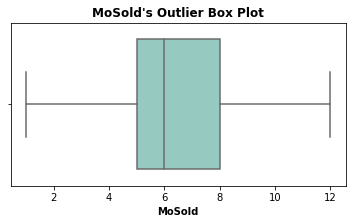

Values lower than 0.5 and higher than 12.5 are outliers for MoSold.

No any outliers for MoSold.


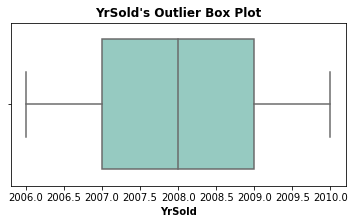

Values lower than 2004.0 and higher than 2012.0 are outliers for YrSold.

No any outliers for YrSold.


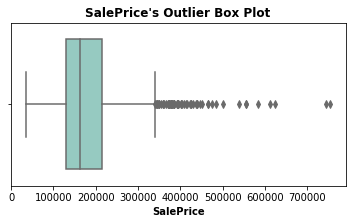

Values lower than 3937.5 and higher than 340037.5 are outliers for SalePrice.

There are 22 outliers for SalePrice: [438780, 501837, 475000, 437154, 426000, 555000, 440000, 430000, 446261, 451950, 423000, 755000, 538000, 485000, 582933, 611657, 556581, 424870, 625000, 745000, 465000, 466500]


In [12]:
# We need to eliminate Object data type columns. We need to numeric data for outlier analysis 
for i in [col for col in d_train.columns if d_train[col].dtype != 'O']:
    if i != "Id":
        outlier_plotting(i)

In [13]:
d_train.loc[outlier_indexes]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,1143,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,New,Partial,424870
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000


* We can see the entire values of the index which has outliers. 

Ready to drop:

In [14]:
d_train = d_train.drop(outlier_indexes,axis = 0).reset_index(drop = True)
# There are no outliers in data anymore.
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1195 non-null   int64  
 1   MSSubClass     1195 non-null   int64  
 2   MSZoning       1195 non-null   object 
 3   LotFrontage    989 non-null    float64
 4   LotArea        1195 non-null   int64  
 5   Street         1195 non-null   object 
 6   Alley          71 non-null     object 
 7   LotShape       1195 non-null   object 
 8   LandContour    1195 non-null   object 
 9   Utilities      1195 non-null   object 
 10  LotConfig      1195 non-null   object 
 11  LandSlope      1195 non-null   object 
 12  Neighborhood   1195 non-null   object 
 13  Condition1     1195 non-null   object 
 14  Condition2     1195 non-null   object 
 15  BldgType       1195 non-null   object 
 16  HouseStyle     1195 non-null   object 
 17  OverallQual    1195 non-null   int64  
 18  OverallC

<a id = "6"></a>


# Handling Missing Values and Feature Engineering

##### We must combine train and test datasets. Because his process are must be carried out together.

In [15]:
alldata = pd.concat([d_train,d_test],axis=0,sort=False)
alldata["SalePrice"].head()

0    208500.0
1    223500.0
2    250000.0
3    307000.0
4    129500.0
Name: SalePrice, dtype: float64

In [16]:
alldata["SalePrice"].tail()

1454   NaN
1455   NaN
1456   NaN
1457   NaN
1458   NaN
Name: SalePrice, dtype: float64

In [17]:
pd.set_option('display.max_rows', 100)
info_count = pd.DataFrame(alldata.isnull().sum(),columns=['Count of NaN'])
dtype = pd.DataFrame(alldata.dtypes,columns=['DataTypes'])
info = pd.concat([info_count,dtype],axis=1)
info


,Count of NaN,DataTypes
Id,0,int64
MSSubClass,0,int64
MSZoning,4,object
LotFrontage,433,float64
LotArea,0,int64
Street,0,object
Alley,2476,object
LotShape,0,object
LandContour,0,object
Utilities,2,object


* Now we can see how many NaN values are in which column. 

* I will fill those containing a reasonable number of NaN values with most common values.

* I will fill those containing many NaN values with Sklearn Label Encoder. In this way, some of the object type data will also be transformed into numeric data.

In [18]:
from sklearn.preprocessing import LabelEncoder

# Filling 433 LotFrontage values. I will use linear interpolation to fill these NaN values.
alldata['LotFrontage'].interpolate(method='linear',inplace=True)

# Filling other NaNs
for i in info.T:
    if i == "Id" or i == "SalePrice" or i == "LotFrontage":
        continue
    else:
        if (info.T[i][0] == 0):
            continue
        elif (info.T[i][0] < 400):
            alldata[i].fillna(alldata[i].value_counts().index[0], inplace = True)
        else:
            lbl_enc = LabelEncoder() 
            lbl_enc.fit(list(alldata[i].values)) 
            alldata[i] = lbl_enc.transform(list(alldata[i].values))
            

In [19]:
alldata.isna().any().value_counts()

False    80
True      1
dtype: int64

* As you can see there are NaN values in only one column. This column is SalePrice which come from test dataset. So everything looks fine.

In [20]:
pd.set_option('display.max_columns', 81)
alldata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,2,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,5,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,2,4,3,0,2,2008,WD,Normal,208500.0
1,3,60,RL,68.0,11250,Pave,2,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,4,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,2,4,3,0,9,2008,WD,Normal,223500.0
2,5,60,RL,84.0,14260,Pave,2,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,4,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,2,4,3,0,12,2008,WD,Normal,250000.0
3,7,20,RL,75.0,10084,Pave,2,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,2,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,2,4,3,0,8,2007,WD,Normal,307000.0
4,11,20,RL,70.0,11200,Pave,2,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906.0,Unf,0.0,134.0,1040.0,GasA,Ex,Y,SBrkr,1040,0,0,1040,1.0,0.0,1,0,3,1,TA,5,Typ,0,5,Detchd,1965.0,Unf,1.0,384.0,TA,TA,Y,0,0,0,0,0,0,2,4,3,0,2,2008,WD,Normal,129500.0


* We have still columns in object datatype. We need to handle this columns. Because we will use machine learning algorithms.

In [21]:
list_ = ["MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig",
        "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle",
        "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd",
        "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", 
        "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual",
        "Functional", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "SaleType",
        "SaleCondition"]

for feature in list_:
    alldata[feature]= alldata[feature].astype("category")
    alldata = pd.get_dummies(alldata, columns=[feature])

In [22]:
pd.set_option('display.max_columns', 500)
alldata.head()

,Id,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,S

In [23]:
pd.set_option('display.max_columns', 500)
alldata.tail()

,Id,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,S

* Now we can seperate train and test data.

In [24]:
train = alldata[0:1195]
test = alldata[1195:2919]

* Let's take a look at our train data. Correlation and relationship between some variables.
* Corelation defines as a mutual relationship or connection between two or more things. A negative, or inverse correlation, between two variables, indicates that one variable increases while the other decreases. A positive correlation is a relationship between two variables in which both variables move in the same direction.

Let's look at our data.

<a id = "8"></a>


# Relationship Between Some Variables

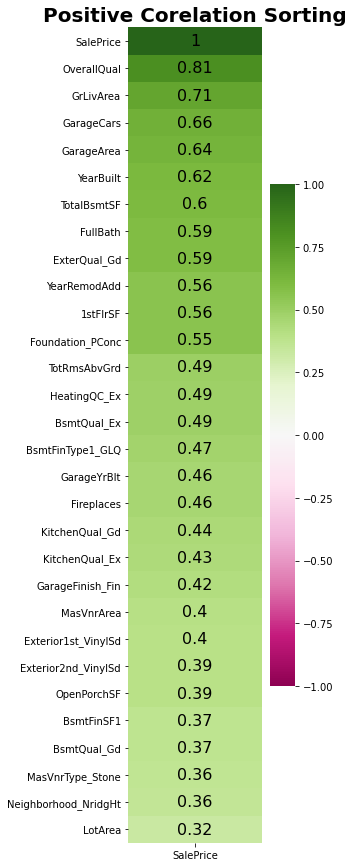

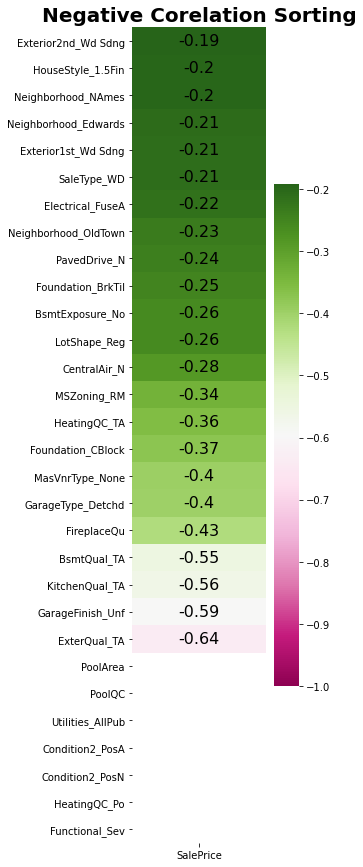

In [25]:
import seaborn as sns
corr_new_train=train.corr()

plt.figure(figsize=(3,15))
sns.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30),
            annot_kws={"size": 16, "color": "black"},vmin=-1, cmap='PiYG', annot=True)
plt.title("Positive Corelation Sorting",fontweight="bold", fontsize = 20)
plt.show()

plt.figure(figsize=(3,15))
sns.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).tail(30),
            annot_kws={"size": 16, "color": "black"},vmin=-1, cmap='PiYG', annot=True)
plt.title("Negative Corelation Sorting",fontweight="bold", fontsize = 20)


plt.show()

* We can easily understand that OverallQual and GrLiveArea affect the sale price more than other features, and this effect is positive.

* We can easily understand that ExterQual_TA and GarageFinish_Unf affect the sale price more than other features, and this effect is negative.


Now let's look at the relationship between some features and sale price.

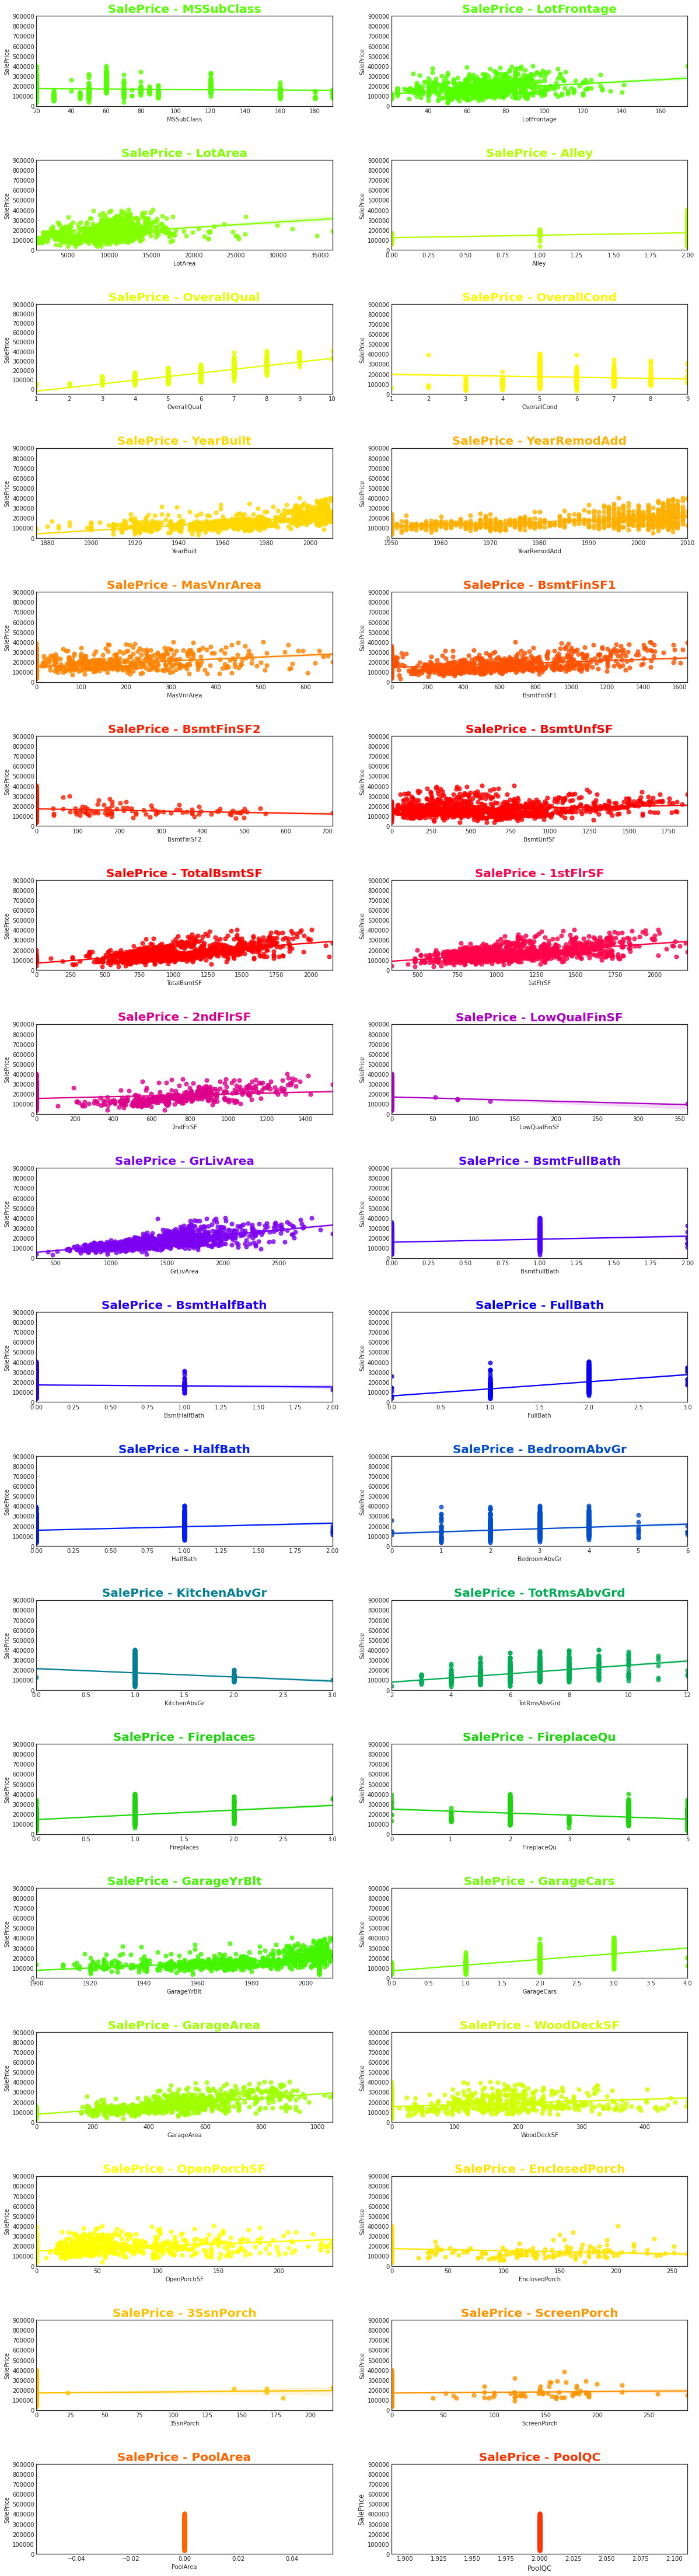

In [26]:
list_ = ["MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig",
        "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle",
        "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd",
        "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", 
        "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual",
        "Functional", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "SaleType",
        "SaleCondition"]

numerical_feature = []
for i in train.columns:
    if i not in list_:
        if i == "Id":
            continue
        else:
            numerical_feature.append(i)

        
plt.style.use("seaborn-white")
fig, axes = plt.subplots(18, 2,figsize=(20,80))
fig.subplots_adjust(hspace=0.6)
colors=[plt.cm.prism_r(each) for each in np.linspace(0, 1, len(numerical_feature))]

for i,ax,color in zip(numerical_feature,axes.flatten(),colors):
    
    sns.regplot(x=train[i], y=train["SalePrice"], fit_reg=True,marker='o',scatter_kws={'s':50,'alpha':0.8},color=color,ax=ax)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_yticks(np.arange(0,900001,100000))
    ax.set_title('SalePrice'+' - '+str(i),color=color,fontweight='bold',size=20)



<a id = "19"></a>
# Modeling

First of all, we need to prepare our test and train data.

Our test data contain SalePrice column and has NaN values on this column. We have to drop this column.
Test data also contain Id column which have to be drop.

In [27]:
test = test.drop("SalePrice", axis=1)
test = test.drop("Id", axis=1)

We will use train data while modelling and this train data must not contain the Sale Price and insignificant Id column. After trained model, we will test it with our absolute SalePrice values. So I separate the SalePrice data from the train yield and transfer it into a dataframe called "y". I do this by scaling my data.

In [28]:
y = np.log1p(train['SalePrice'])
x = train.drop(["Id", "SalePrice"], axis=1)

Now I will create the some regression models with default parameter values and calculate RMSE for each.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [30]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn import metrics
import random as rd
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

In [31]:
for name, regressor in models:
    model = regressor
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MSE = metrics.mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(MSE)
    print(f"RMSE: {round(RMSE, 4)} ({name})")

RMSE: 0.127 (LR)
RMSE: 0.1182 (Ridge)
RMSE: 0.1667 (Lasso)
RMSE: 0.1588 (ElasticNet)
RMSE: 0.2296 (KNN)
RMSE: 0.1943 (CART)
RMSE: 0.141 (RF)
RMSE: 0.2061 (SVR)
RMSE: 0.1274 (GBM)
RMSE: 0.138 (XGBoost)
RMSE: 0.1306 (LightGBM)
RMSE: 0.1191 (CatBoost)


<a id = "20"></a>
## Hyperparameter Tuning - Grid Search - Cross Validation

Now, time to hyperparameter tuning with the ones with the lowest mean square error from the above machine learning algorithms.

In [32]:
random_state = 42
classifier = [Ridge(random_state = random_state),
              DecisionTreeRegressor(random_state = random_state),
             LGBMRegressor(random_state = random_state),
              GradientBoostingRegressor(random_state = random_state),
             CatBoostRegressor(verbose=False, random_state = random_state)]

ridge_param_grid = {"solver" : ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"],
                   "normalize" : [True, False]}

dtr_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2),
                 "splitter": ["best", "random"]}

lgbmr_param_grid = {"learning_rate": [0.001, 0.01, 0.05],
               "n_estimators": [200, 500, 750],
               "max_depth": [-1, 2, 5],
               "colsample_bytree": [1, 0.50, 0.75]}

gbr_param_grid = {"loss": ["ls", "huber", "quantile"],
                 "n_estimators":[100,300],
                 "min_samples_split" : range(10,400,50)}

catboost_param_grid = {"learning_rate": np.linspace(0,0.2,5),
                 "n_estimators":[100, 200, 300]}


classifier_param = [ridge_param_grid,
                   dtr_param_grid,
                   lgbmr_param_grid,
                   gbr_param_grid,
                   catboost_param_grid]

error = []
estimator = []
for i in range(len(classifier)):
    
    model = GridSearchCV(classifier[i],
                            classifier_param[i],
                            cv=10,
                            n_jobs=-1, 
                            scoring = "neg_mean_squared_error",
                            verbose=True).fit(X_train, y_train)
    rmse = np.mean(np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))
    error.append(rmse)
    estimator.append(str(classifier[i]))

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   16.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done 133 out of 140 | elapsed:   10.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done 133 out of 140 | elapsed:   10.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done 133 out of 140 | elapsed:    9.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done 133 out of 140 | elapsed:   10.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done 133 out of 140 | elapsed:   10.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 3400 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   35.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 3400 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   31.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 3400 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   32.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 3400 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   32.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 3400 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   32.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 3400 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   32.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  2.6min finished


Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  2.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  2.0min finished


Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  2.0min finished


Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  2.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  2.0min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  4.3min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.5min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.5min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.6min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.5min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.5min finished


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.1min finished


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.1min finished


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.9min finished


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.9min finished


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.0min finished


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.9min finished


Text(0.5, 1.0, 'Cross Validation Scores')

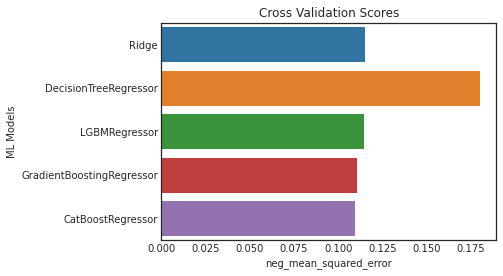

In [33]:
cv_results = pd.DataFrame({"Cross Validation Errors":error, "ML Models":["Ridge", "DecisionTreeRegressor",
                                                                         "LGBMRegressor","GradientBoostingRegressor",
                                                                        "CatBoostRegressor"]})

g = sns.barplot("Cross Validation Errors", "ML Models", data = cv_results)
g.set_xlabel("neg_mean_squared_error")
g.set_title("Cross Validation Scores")

In [34]:
error_results = pd.DataFrame({"ML Models":["Ridge", "DecisionTreeRegressor",
                                            "LGBMRegressor","GradientBoostingRegressor",
                                          "CatBoostRegressor"], 
                                              'Mean Squared Error':error})
error_results

,ML Models,Mean Squared Error
0,Ridge,0.115302
1,DecisionTreeRegressor,0.180410
2,LGBMRegressor,0.114783
3,GradientBoostingRegressor,0.110802
4,CatBoostRegressor,0.109624


As you can see CatBoostRegressor has the best accuracy. Let's look at the which parameters are the best for this algorithm.

In [35]:
catboost_param_grid = {"learning_rate": np.linspace(0,0.2,5),
                 "n_estimators":[100, 200, 300],
                      "max_depth": [3,4,5],
                      "silent": [True]}

CatBoostRegressor_model = GridSearchCV(CatBoostRegressor(random_state = random_state),
                            catboost_param_grid,
                            cv=10,
                            n_jobs=-1,
                            verbose=True).fit(X_train, y_train)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.7min finished


In [36]:
CatBoostRegressor_model.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'silent': True}

Now we can create final model with GradientBoostingRegressor and its best parameters.

In [37]:
params = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, "silent" : True}

final_model = CatBoostRegressor(**params)

In [38]:
final_model.fit(X_train,y_train)

In [39]:
rmse = np.mean(np.sqrt(-cross_val_score(final_model, X_train, y_train, cv=20, scoring="neg_mean_squared_error")))
rmse

0.10953567873835121

Finally we can predict SalePrice of test data.

In [40]:
submission_absolute_prices = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
y_pred = final_model.predict(test)
y_pred = np.expm1(y_pred)
df = pd.DataFrame({'Actual':submission_absolute_prices["SalePrice"], 'Predicted':y_pred})

In [41]:
submission_df = pd.DataFrame()
submission_df["Id"] = d_test["Id"] 
submission_df['SalePrice'] = df["Predicted"]
submission_df

,Id,SalePrice
0,1461,128270.162679
1,1462,162331.764434
2,1463,187146.261392
3,1464,200295.245655
4,1465,203142.453201
...,...,...
1454,2915,81552.212871
1455,2916,81640.766088
1456,2917,166915.425802
1457,2918,122532.960555


In [42]:
submission_df.to_csv('submission.csv', index=False)

## Please upvote and make comment if you like my notebook.
# Thanks!